<a href="https://colab.research.google.com/github/ankit-rathi/Data-Science-with-Python/blob/master/Nifty100_StdDev_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
#!pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed


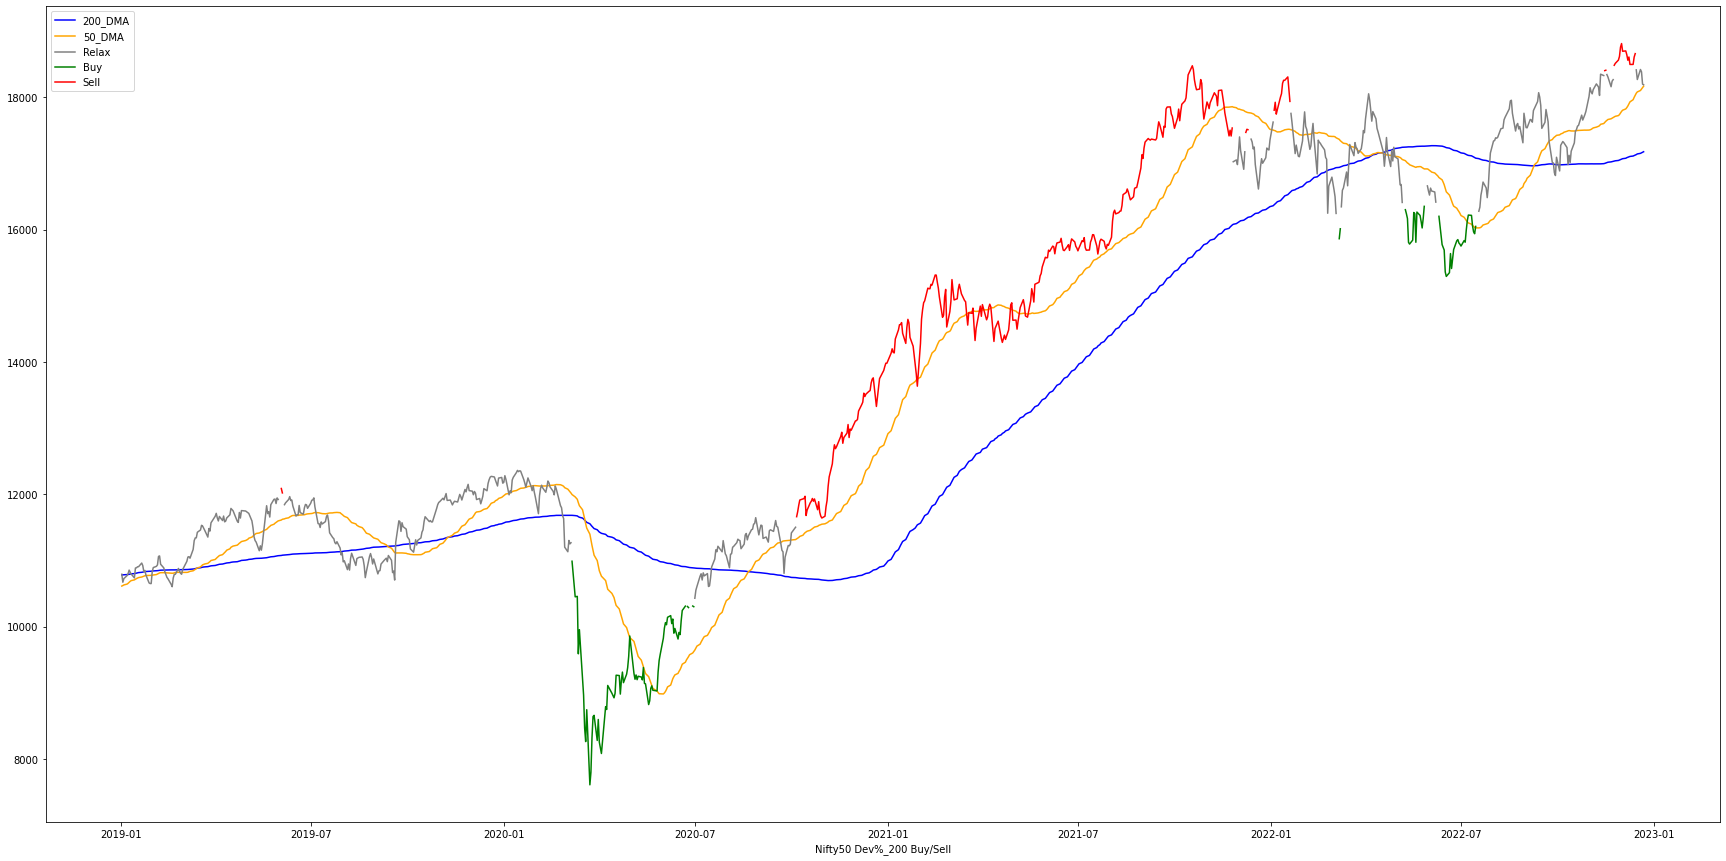

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import datetime
import yfinance as yfin
yfin.pdr_override()

stock_symbol = '^NSEI'
start_date = (datetime.date.today() + datetime.timedelta(days=-365*10)).strftime('%Y-%m-%d')
#end_date = '2020-01-01'
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')

# import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
start = datetime.datetime(*map(int, start_date.split('-')))
end = datetime.datetime(*map(int, end_date.split('-'))) 
stock_df = web.DataReader(stock_symbol, start = start, end = end)[['Close','Volume']]

stock_df['200_DMA'] = stock_df['Close'].rolling(window = 200, min_periods = 1).mean()
stock_df['50_DMA'] = stock_df['Close'].rolling(window = 50, min_periods = 1).mean()
stock_df['Dev%_200'] = round((stock_df['Close'] - stock_df['200_DMA'])*100/stock_df['200_DMA'],2)

nmax = stock_df[stock_df['Dev%_200'] > 0]['Dev%_200'].mean()
nmin = stock_df[stock_df['Dev%_200'] < 0]['Dev%_200'].mean()

stock_df['Flag'] = 'Na'
stock_df.loc[stock_df['Dev%_200'] < nmin, 'Flag'] = 'Buy'
stock_df.loc[stock_df['Dev%_200'] > nmax, 'Flag'] = 'Sell'

df = stock_df[stock_df.index >= '2019-01-01']

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plt.xlabel('Nifty50 Dev%_200 Buy/Sell')
plt.plot(df["200_DMA"], color="blue", label="200_DMA")
plt.plot(df["50_DMA"], color="orange", label="50_DMA")
plt.plot(df.index, np.where(df["Flag"]=='Na', df["Close"], None), color="grey", label="Relax")
plt.plot(df.index, np.where(df["Flag"]=='Buy', df["Close"], None), color="green", label="Buy")
plt.plot(df.index, np.where(df["Flag"]=='Sell', df["Close"], None), color="red", label="Sell")
plt.legend()